In [4]:
import pandas as pd
import numpy as np

# Load Haverhill Dataset

In [5]:
from os import path
project_root = path.dirname(path.dirname(os.path.abspath('')))
haverhill_uncleaned_dataset_path = path.join(project_root, 'datasets/haverhill_school_incident_reports.csv')

In [6]:
haverhill = pd.read_csv(haverhill_uncleaned_dataset_path)

In [7]:
haverhill = haverhill[haverhill['Offender Race'] != 'MALE']

In [8]:
print(f"Number of incidents in Haverhill dataset {len(haverhill)}")

Number of incidents in Haverhill dataset 248


# Analyze Narrative field

In [9]:
haverhill['summons_in_narrative'] = haverhill.apply(lambda row: 1 if 'summons' in row.Narrative else 0, axis = 1)

In [10]:
haverhill['arrest_in_narrative'] = haverhill.apply(lambda row: 1 if 'arrest' in row.Narrative else 0, axis = 1)

In [11]:
print("number of incidents which include 'Summons' in the narrative: ", haverhill['summons_in_narrative'].value_counts()[1])

number of incidents which include 'Summons' in the narrative:  34


In [12]:
print("number of incidents which include 'Arrest' in the narrative: ", haverhill['arrest_in_narrative'].value_counts()[1])

number of incidents which include 'Arrest' in the narrative:  11


# Analyze race

## Distriution of race where incidents narrative field included summons or arrest

In [13]:
haverhill_arrest_or_summons = haverhill[(haverhill['summons_in_narrative'] == 1) | (haverhill['arrest_in_narrative'] == 1)]

<AxesSubplot:title={'center':'Distribution of race (Arrest or Summons)'}>

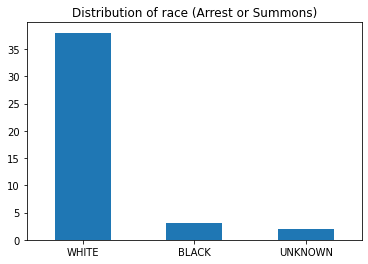

In [14]:
haverhill_arrest_or_summons['Offender Race'].value_counts().plot(kind='bar', orientation='vertical', rot=0, title='Distribution of race (Arrest or Summons)')

## Distriution of race where incidents narrative field does not include summons or arrest

In [15]:
haverhill_no_arrest_or_summons = haverhill[(haverhill['summons_in_narrative'] == 0) & (haverhill['arrest_in_narrative'] == 0)]

<AxesSubplot:title={'center':'Distribution of race (No Arrest or Summons)'}>

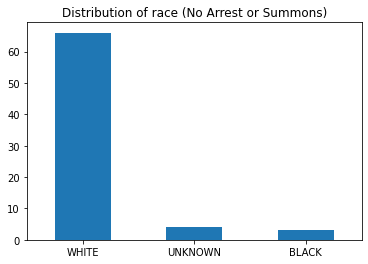

In [16]:
haverhill_no_arrest_or_summons['Offender Race'].value_counts().plot(kind='bar', orientation='vertical', rot=0, title='Distribution of race (No Arrest or Summons)')

# Analyize incident type

In [17]:
def parse_incident_type(row):
    try:
        return row['Incident Type/Offense'].split(')', 1)[0].split('(', 1)[1]
    except Exception:
        return np.nan

In [18]:
haverhill['incident_type_cleaned'] = haverhill.apply(lambda row: parse_incident_type(row), axis = 1)

In [20]:
haverhill['incident_type_cleaned'].value_counts()

MISC         48
106          47
265/13A/B    31
275/2        16
265/15A/A    10
51A          10
269/14        9
266/30/C      8
158A          7
272/40/A      7
OV            6
265/13B/A     4
265/15B/A     3
266/126B      3
266/120       3
269/10/A      2
266/30/A      2
269/13        2
265/13D/B     2
272/53/F      2
266/16/A      2
266/127/A     2
265/43A       2
266/127/C     2
258E/9        1
266/5A/B      1
272/77/A      1
266/20/A      1
94C/34/G      1
94C/32C/C     1
266/98/A      1
104D          1
148/39/A      1
106O          1
272/28/A      1
90/24/A       1
94G/2         1
266/126A      1
265/13D/A     1
94C/32B/C     1
104E          1
266/60/B      1
Name: incident_type_cleaned, dtype: int64

<AxesSubplot:title={'center':'Distribution of Incident Types'}>

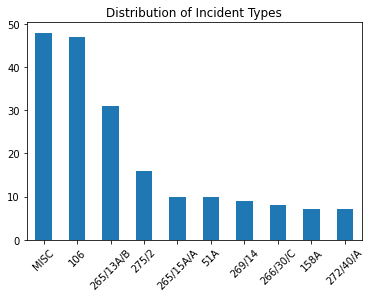

In [21]:
haverhill['incident_type_cleaned'].value_counts().head(10).plot(kind='bar', orientation='vertical', rot=45, title='Distribution of Incident Types')